# **Guía de Usuario**

**TFM 2024: Proyectos Tecnológicos Mediante Metodología Ágil. Gestión de Riesgos y Complejidad**

Autor: Leandro Leonardo

---

Resumen

Este Trabajo de Fin de Máster examina la gestión de riesgos en proyectos tecnológicos —como los de investigación multidisciplinar, sistemas de información e inteligencia artificial— mediante el uso de metodologías ágiles en entornos VUCA (Volatilidad, Incertidumbre, Complejidad y Ambigüedad). El estudio se enfoca en un modelo simplificado de inferencia bayesiana, implementado en Python, que facilita la predicción de riesgos complejos y la selección adaptativa de metodologías ágiles. El principal objetivo es evaluar cómo la inferencia bayesiana puede predecir y gestionar riesgos complejos a lo largo del ciclo de vida del proyecto, permitiendo seleccionar la metodología ágil más adecuada en cada fase. Esta aproximación permite una aplicación práctica, maximizando la adaptación a los cambios y reduciendo el consumo de recursos. Los resultados muestran que este enfoque optimiza la toma de decisiones en entornos tecnológicos, mejorando el éxito y control de los proyectos.

---

Palabras clave: Gestión de riesgos, Metodologías ágiles, Entornos VUCA, Inferencia bayesiana, Proyectos tecnológicos, Adaptación dinámica.

---

English?

Please, click here (GitHub).
https://github.com/lelesanrd/mulcia-logica-computacion-ia

---


#Paso 0: Instalación de Librerías
Antes de comenzar, es necesario instalar las librerías requeridas. Ejecuta las siguientes celdas de código.


In [138]:
# Paso 0: Instalar las librerías necesarias.

# Instalaciones específicas para pgmpy versión 0.1.26
!pip install pgmpy==0.1.26 --quiet

# Ejecutar en terminal o como bloque de código en Jupyter Notebook
!pip install numpy pandas scikit-learn pgmpy ipywidgets matplotlib networkx --quiet


#Paso 1: Importar las Librerías Necesarias
En este paso, importamos todas las librerías necesarias para el análisis y la visualización de datos.

In [139]:
# Paso 1: Importar las librerías necesarias
# Importar librerías principales para el manejo de datos, gráficos, interfaces y modelos estadísticos

import pandas as pd                  # Para manipulación y análisis de datos, creación de DataFrames y series de datos
import numpy as np                   # Para operaciones matemáticas y manejo de matrices y arreglos numéricos
import matplotlib.pyplot as plt       # Para la creación de gráficos y visualización de datos
import seaborn as sns                 # Para gráficos estadísticos avanzados con mejor estética y facilidad de uso en combinación con matplotlib
import random                         # Para generar números aleatorios, útil en la simulación de datos o selección aleatoria
import ipywidgets as widgets          # Para crear widgets interactivos en entornos de Jupyter, como botones y menús desplegables
from IPython.display import display, clear_output   # Para mostrar elementos y limpiar la salida en notebooks de Jupyter

# Librerías de Machine Learning y métricas de evaluación
from sklearn.preprocessing import LabelEncoder, label_binarize  # Para transformar variables categóricas a formato numérico, necesario en modelos de ML
from sklearn.metrics import confusion_matrix, roc_curve, auc    # Para calcular métricas de evaluación de modelos, como la matriz de confusión, curvas ROC y área bajo la curva (AUC)

# Librerías para trabajar con redes bayesianas y realizar inferencias probabilísticas
from pgmpy.models import BayesianNetwork               # Para crear y estructurar redes bayesianas
from pgmpy.estimators import MaximumLikelihoodEstimator # Para estimar los parámetros de las redes bayesianas mediante el método de máxima verosimilitud
from pgmpy.inference import VariableElimination         # Para realizar inferencia en redes bayesianas eliminando variables irrelevantes

# Librerías para manipular y visualizar gráficos de redes
import networkx as nx                  # Para crear y visualizar grafos, útil para representar gráficamente la estructura de redes bayesianas

# Configuración de estilo para gráficos
sns.set_theme(style="whitegrid")


#Paso 2: Definir Variables de Datos y Listas de Opciones
Definimos las fases del proyecto y las metodologías ágiles disponibles que serán utilizadas en el análisis.

In [140]:
# Paso 2: Definir las variables de datos y listas de opciones

# Definir las fases del proyecto
project_phases = ['Inicio', 'Planificación', 'Ejecución', 'Monitoreo', 'Cierre']

# Definir las metodologías ágiles disponibles
agile_methods = [
    'Scrum', 'Kanban', 'Lean', 'XP', 'Crystal', 'DSDM', 'FDD', 'AM', 'SAFe',
    'DAD', 'LeSS', 'Nexus', 'Agile UP', 'DevOps', 'ScrumBan'
]


#Paso 3: Crear la Tabla de Métricas de Metodologías
Esta tabla contiene información sobre cada metodología, incluyendo su tipo, categoría y puntajes en diferentes criterios como adaptabilidad, visibilidad y mitigación.

In [141]:
# Paso 3: Crear la tabla de métricas de metodologías

# Crear la tabla de métricas de metodologías
methodology_metrics = pd.DataFrame({
    'Metodología': agile_methods,
    'Tipo': ['Iterativo', 'Flujo', 'Eficiencia', 'Iterativo', 'Flexibilidad', 'Estructurado', 'Característica',
             'Modelado', 'Escalable', 'Escalable', 'Escalable', 'Escalable', 'Estructurado', 'Integración continua', 'Híbrido'],
    'Categoría': ['Ligero', 'Ligero', 'Ligero', 'Ligero', 'Ligero', 'Pesado', 'Ligero',
                  'Ligero', 'Pesado', 'Pesado', 'Pesado', 'Pesado', 'Pesado', 'Ligero', 'Ligero'],
    'Adaptabilidad': [4.5, 4.0, 3.8, 4.7, 4.0, 3.5, 3.8, 4.2, 3.7, 4.0, 3.8, 3.5, 3.5, 4.5, 4.2],
    'Visibilidad': [4.0, 4.5, 3.5, 3.8, 3.5, 3.8, 3.5, 4.0, 4.2, 4.0, 4.0, 3.8, 3.5, 4.2, 4.3],
    'Mitigación': [4.2, 4.0, 4.5, 4.3, 4.0, 3.9, 3.7, 4.1, 4.0, 4.1, 3.9, 3.7, 3.8, 4.5, 4.2]
})

# Calcular el puntaje total promedio de adaptabilidad, visibilidad y mitigación
methodology_metrics['Puntaje Total'] = methodology_metrics[['Adaptabilidad', 'Visibilidad', 'Mitigación']].mean(axis=1)

# Mostrar la tabla de métricas
methodology_metrics


,Metodología,Tipo,Categoría,Adaptabilidad,Visibilidad,Mitigación,Puntaje Total
0,Scrum,Iterativo,Ligero,4.5,4.0,4.2,4.233333
1,Kanban,Flujo,Ligero,4.0,4.5,4.0,4.166667
2,Lean,Eficiencia,Ligero,3.8,3.5,4.5,3.933333
3,XP,Iterativo,Ligero,4.7,3.8,4.3,4.266667
4,Crystal,Flexibilidad,Ligero,4.0,3.5,4.0,3.833333
5,DSDM,Estructurado,Pesado,3.5,3.8,3.9,3.733333
6,FDD,Característica,Ligero,3.8,3.5,3.7,3.666667
7,AM,Modelado,Ligero,4.2,4.0,4.1,4.100000
8,SAFe,Escalable,Pesado,3.7,4.2,4.0,3.966667
9,DAD,Escalable,Pesado,4.0,4.0,4.1,4.033333


#Paso 4: Simular Datos para Proyectos con Variables Adicionales
Generamos datos aleatorios para simular diferentes proyectos y sus características. Estos datos serán utilizados para entrenar y evaluar la red bayesiana.

In [142]:
# Paso 4: Simular datos para proyectos con variables adicionales
# Número de registros a simular
num_records = 500

# Simular los datos del proyecto
data = pd.DataFrame({
    'Tipo de Proyecto': np.random.choice(['Inteligencia Artificial', 'Sistemas de Información', 'Investigación Multidisciplinaria'], num_records),
    'Complejidad': np.random.choice(['Baja', 'Media', 'Alta'], num_records),
    'Nivel de Riesgo': np.random.choice(['Bajo', 'Medio', 'Alto'], num_records),
    'Tamaño del Equipo': np.random.choice(['Muy pequeño', 'Pequeño', 'Mediano', 'Grande', 'Muy grande'], num_records),
    'Duración del Proyecto': np.random.choice(['Muy corta', 'Corta', 'Moderada', 'Larga', 'Muy larga'], num_records),
    'Riesgo Clave': np.random.choice(['Técnicos', 'Operativos', 'Organizacionales'], num_records),
    'Alcance': np.random.choice(['Limitado', 'Medio', 'Amplio'], num_records),
    'Restricción de Tiempo': np.random.choice(['Flexibles', 'Moderadas', 'Estrictas'], num_records),
    'Restricción de Costo': np.random.choice(['Bajo', 'Medio', 'Alto'], num_records),
    'Participación de Interesados': np.random.choice(['Bajo', 'Medio', 'Alto'], num_records),
    'Adaptabilidad Requerida': np.random.choice(['Bajo', 'Medio', 'Alto'], num_records),
    'Visibilidad Requerida': np.random.choice(['Bajo', 'Medio', 'Alto'], num_records),
    'Mitigación Requerida': np.random.choice(['Bajo', 'Medio', 'Alto'], num_records),
    'Madurez Organizacional': np.random.choice(['Baja', 'Media', 'Alta'], num_records),
    'Disponibilidad de Recursos': np.random.choice(['Escasa', 'Adecuada', 'Abundante'], num_records),
    'Complejidad Técnica': np.random.choice(['Baja', 'Media', 'Alta'], num_records),
    'Frecuencia de Cambios en Requisitos': np.random.choice(['Baja', 'Media', 'Alta'], num_records),
    'Estabilidad del Entorno del Proyecto': np.random.choice(['Estable', 'Moderado', 'Inestable'], num_records),
    'Fase': np.random.choice(project_phases, num_records),
    'Metodología Recomendada': np.random.choice(agile_methods, num_records)
})

# Mostrar las primeras filas de los datos simulados
data.head()


,Tipo de Proyecto,Complejidad,Nivel de Riesgo,Tamaño del Equipo,Duración del Proyecto,Riesgo Clave,Alcance,Restricción de Tiempo,Restricción de Costo,Participación de Interesados,Adaptabilidad Requerida,Visibilidad Requerida,Mitigación Requerida,Madurez Organizacional,Disponibilidad de Recursos,Complejidad Técnica,Frecuencia de Cambios en Requisitos,Estabilidad del Entorno del Proyecto,Fase,Metodología Recomendada
0,Inteligencia Artificial,Baja,Bajo,Muy grande,Larga,Técnicos,Medio,Estrictas,Alto,Alto,Bajo,Medio,Medio,Media,Escasa,Alta,Alta,Moderado,Monitoreo,Kanban
1,Inteligencia Artificial,Media,Bajo,Pequeño,Moderada,Operativos,Amplio,Estrictas,Medio,Bajo,Bajo,Alto,Alto,Baja,Abundante,Alta,Alta,Moderado,Ejecución,Crystal
2,Investigación Multidisciplinaria,Media,Alto,Pequeño,Muy corta,Operativos,Amplio,Flexibles,Medio,Bajo,Alto,Bajo,Medio,Baja,Adecuada,Media,Media,Estable,Cierre,FDD
3,Sistemas de Información,Media,Medio,Grande,Larga,Técnicos,Limitado,Estrictas,Medio,Medio,Bajo,Bajo,Medio,Alta,Adecuada,Alta,Media,Moderado,Cierre,DAD
4,Inteligencia Artificial,Baja,Medio,Pequeño,Corta,Técnicos,Medio,Flexibles,Bajo,Alto,Bajo,Alto,Alto,Alta,Adecuada,Alta,Baja,Estable,Planificación,Crystal


#Paso 5: Codificar las Variables Categóricas
Convertimos las variables categóricas en numéricas utilizando LabelEncoder. Esto es necesario para entrenar la red bayesiana.

In [143]:
# Paso 5: Codificar las variables categóricas

# Inicializar el diccionario para almacenar los codificadores
label_encoders = {}

# Codificar las variables categóricas
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Mostrar las primeras filas de los datos codificados
data.head()


,Tipo de Proyecto,Complejidad,Nivel de Riesgo,Tamaño del Equipo,Duración del Proyecto,Riesgo Clave,Alcance,Restricción de Tiempo,Restricción de Costo,Participación de Interesados,Adaptabilidad Requerida,Visibilidad Requerida,Mitigación Requerida,Madurez Organizacional,Disponibilidad de Recursos,Complejidad Técnica,Frecuencia de Cambios en Requisitos,Estabilidad del Entorno del Proyecto,Fase,Metodología Recomendada
0,0,1,1,2,1,2,2,0,0,0,1,2,2,2,2,0,0,2,3,7
1,0,2,1,4,2,0,0,0,2,1,1,0,0,1,0,0,0,2,1,2
2,1,2,0,4,3,0,0,1,2,1,0,1,2,1,1,2,2,0,0,6
3,2,2,2,0,1,2,1,0,2,2,1,1,2,0,1,0,2,2,0,3
4,0,1,2,4,0,2,2,1,1,0,1,0,0,0,1,0,1,0,4,2


#Paso 6: Definir la Estructura de la Red Bayesiana
Establecemos la estructura de la red bayesiana con las relaciones entre las variables. Esta estructura define cómo las variables se influyen mutuamente.

In [144]:
# Paso 6: Definir la estructura de la red bayesiana

# Incluimos el nodo 'Fase' y sus relaciones con otras variables si es necesario.
model_bayes_identificada = BayesianNetwork([
    ('Tipo de Proyecto', 'Metodología Recomendada'),
    ('Complejidad', 'Metodología Recomendada'),
    ('Nivel de Riesgo', 'Metodología Recomendada'),
    ('Fase', 'Metodología Recomendada'),  # Aseguramos que 'Fase' esté en la red y conectada
    ('Adaptabilidad Requerida', 'Metodología Recomendada'),
    ('Visibilidad Requerida', 'Metodología Recomendada'),
    ('Mitigación Requerida', 'Metodología Recomendada'),
    ('Restricción de Tiempo', 'Nivel de Riesgo'),
    ('Restricción de Costo', 'Nivel de Riesgo'),
    ('Tamaño del Equipo', 'Complejidad'),
    ('Duración del Proyecto', 'Complejidad'),
    ('Madurez Organizacional', 'Nivel de Riesgo'),
    ('Disponibilidad de Recursos', 'Metodología Recomendada'),
    ('Complejidad Técnica', 'Nivel de Riesgo'),
    ('Frecuencia de Cambios en Requisitos', 'Complejidad'),
    ('Estabilidad del Entorno del Proyecto', 'Nivel de Riesgo')
])

# Asegúrate de copiar la red completa, incluyendo el nodo 'Fase'
current_recommended_network = model_bayes_identificada.copy()

# Mostrar la estructura de la red bayesiana
model_bayes_identificada.edges()


OutEdgeView([('Tipo de Proyecto', 'Metodología Recomendada'), ('Complejidad', 'Metodología Recomendada'), ('Nivel de Riesgo', 'Metodología Recomendada'), ('Fase', 'Metodología Recomendada'), ('Adaptabilidad Requerida', 'Metodología Recomendada'), ('Visibilidad Requerida', 'Metodología Recomendada'), ('Mitigación Requerida', 'Metodología Recomendada'), ('Restricción de Tiempo', 'Nivel de Riesgo'), ('Restricción de Costo', 'Nivel de Riesgo'), ('Tamaño del Equipo', 'Complejidad'), ('Duración del Proyecto', 'Complejidad'), ('Madurez Organizacional', 'Nivel de Riesgo'), ('Disponibilidad de Recursos', 'Metodología Recomendada'), ('Complejidad Técnica', 'Nivel de Riesgo'), ('Frecuencia de Cambios en Requisitos', 'Complejidad'), ('Estabilidad del Entorno del Proyecto', 'Nivel de Riesgo')])

#Paso 7: Entrenar la Red Bayesiana Identificada
Entrenamos la red bayesiana utilizando el estimador de máxima verosimilitud con los datos simulados.

In [145]:
# Paso 7: Entrenar la red bayesiana identificada

# Entrenar la red bayesiana identificada
model_bayes_identificada.fit(data, estimator=MaximumLikelihoodEstimator)


#Paso 8: Inicializar la Red Recomendada como una Copia de la Identificada
Creamos una copia de la red bayesiana identificada que servirá como la red recomendada. Esto nos permitirá realizar modificaciones sin afectar la red original.

In [146]:
# Paso 8: Inicializar la red recomendada como una copia de la identificada

# Inicializar la red recomendada como una copia de la identificada
current_recommended_network = model_bayes_identificada.copy()
inference_recomendada = VariableElimination(current_recommended_network)

# Variables globales para mantener el estado de las tablas y los nodos agregados/quitados
result_table = pd.DataFrame()
nodos_agregados = []
nodos_quitados = []

# Definir colores para nodos y aristas en los gráficos de redes
parent_node_color = '#F4CCCC'  # Rojo pálido suave
child_node_color = '#C9DAF8'   # Azul pálido suave
goal_node_color = '#D9EAD3'    # Verde limón suave
edge_label_color = '#FF0000'   # Rojo para las etiquetas de las aristas
canvas_background_color = '#FFFFFF'  # Blanco para el fondo del lienzo


#Paso 9: Función para Generar la Tabla Combinada de Resultados
Esta función genera una tabla que combina las metodologías identificadas y generadas para cada fase del proyecto, ajustando los niveles de riesgo y las tasas de éxito.

In [147]:
# Paso 9: Función para generar la tabla combinada de resultados
def generar_tabla_resultado():
    phase_data = []

    # Obtiene los valores actuales de los widgets para cada ejecución
    evidencia_usuario = {key: widget.value for key, widget in widgets_dict.items()}

    for phase in project_phases:
        try:
            # Obtener evidencia numérica y verificar si las variables están en la red
            evidencia_numerica_identificada = {}
            evidencia_numerica_recomendada = {}

            # Procesar evidencia para la fase específica
            for key, value in evidencia_usuario.items():
                encoded_value = label_encoders[key].transform([value])[0]

                # Diferenciar por red identificada y red recomendada
                if key in model_bayes_identificada.nodes():
                    evidencia_numerica_identificada[key] = encoded_value
                if key in current_recommended_network.nodes():
                    evidencia_numerica_recomendada[key] = encoded_value

            # Añadir la fase a la evidencia para diferenciar cada análisis
            fase_encoded = label_encoders['Fase'].transform([phase])[0]
            evidencia_numerica_identificada['Fase'] = fase_encoded
            evidencia_numerica_recomendada['Fase'] = fase_encoded

            # Realizar inferencia en la red identificada para obtener la metodología recomendada
            inferencia_identificada = VariableElimination(model_bayes_identificada)
            resultado_identificada = inferencia_identificada.map_query(
                variables=['Metodología Recomendada'],
                evidence=evidencia_numerica_identificada,
                show_progress=False
            )
            metodologia_identificada_idx = resultado_identificada['Metodología Recomendada']
            metodologia_identificada = label_encoders['Metodología Recomendada'].inverse_transform([metodologia_identificada_idx])[0]
            tipo_identificado = methodology_metrics.loc[
                methodology_metrics['Metodología'] == metodologia_identificada, 'Tipo'].values[0]

            # Obtener el puntaje total de la metodología identificada
            puntaje_identificado = methodology_metrics.loc[
                methodology_metrics['Metodología'] == metodologia_identificada, 'Puntaje Total'].values[0]

            # Simular nivel de riesgo y tasa de éxito identificados
            risk_identified = np.round(random.uniform(20, 40), 2)
            success_identified = np.round(random.uniform(70, 85), 2)

            # Realizar inferencia en la red recomendada para obtener la metodología generada
            inferencia_recomendada = VariableElimination(current_recommended_network)
            resultado_recomendada = inferencia_recomendada.map_query(
                variables=['Metodología Recomendada'],
                evidence=evidencia_numerica_recomendada,
                show_progress=False
            )
            metodologia_recomendada_idx = resultado_recomendada['Metodología Recomendada']
            metodologia_recomendada = label_encoders['Metodología Recomendada'].inverse_transform([metodologia_recomendada_idx])[0]
            tipo_recomendada = methodology_metrics.loc[
                methodology_metrics['Metodología'] == metodologia_recomendada, 'Tipo'].values[0]

            # Comparar puntajes y ajustar riesgo y éxito en la metodología generada
            puntaje_recomendada = methodology_metrics.loc[
                methodology_metrics['Metodología'] == metodologia_recomendada, 'Puntaje Total'].values[0]
            if puntaje_recomendada > puntaje_identificado:
                success_rate = min(100, success_identified + np.round(random.uniform(1, 5), 2))
                reduced_risk = np.round(random.uniform(5, 15), 2)
                expected_risk = max(0, risk_identified - reduced_risk)
            else:
                success_rate = success_identified
                reduced_risk = 0
                expected_risk = risk_identified

            # Añadir datos de la fase a la tabla
            phase_data.append([
                phase,
                metodologia_identificada,
                tipo_identificado,
                risk_identified,
                success_identified,
                metodologia_recomendada,
                tipo_recomendada,
                success_rate,
                reduced_risk,
                expected_risk
            ])
        except Exception as e:
            print(f"Error en fase {phase}: {e}")

    # Crear DataFrame con los resultados de todas las fases
    phase_df = pd.DataFrame(phase_data, columns=[
        "Fase",
        "Metodología Identificada",
        "Tipo Identificado",
        "Nivel de Riesgo Identificado (%)",
        "Tasa de Éxito (%)",
        "Metodología Generada",
        "Tipo Recomendada",
        "Tasa de Éxito Esperado (%)",
        "Cambio en Nivel de Riesgo (%)",
        "Nivel de Riesgo Esperado (%)"
    ])

    return phase_df


#Paso 10: Función para Mostrar las Redes Bayesianas
Esta función visualiza las redes bayesianas identificada y recomendada. He mejorado las etiquetas de las aristas para que reflejen el tipo de influencia de manera más informativa.

In [148]:
# Paso 10: Función para mostrar las redes bayesianas

def mostrar_red_bayesiana(model, title):
    plt.figure(figsize=(12, 8))
    nx_graph = nx.DiGraph()
    nx_graph.add_edges_from(model.edges())
    pos = nx.spring_layout(nx_graph, seed=42)

    # Obtener padres y nodos hijos de 'Metodología Recomendada'
    target_var = 'Metodología Recomendada'
    parents = model.get_parents(target_var)
    children = model.get_children(target_var)

    # Asignar colores a los nodos
    node_colors = []
    for node in nx_graph.nodes():
        if node == target_var:
            node_colors.append(goal_node_color)
        elif node in parents:
            node_colors.append(parent_node_color)
        elif node in children:
            node_colors.append(child_node_color)
        else:
            node_colors.append('#CCCCCC')  # Gris para otros nodos

    # Dibujar nodos con colores especificados
    nx.draw(nx_graph, pos, with_labels=True, node_size=2000, node_color=node_colors,
            font_size=10, font_weight="bold", arrowsize=20)

    # Dibujar etiquetas en las aristas con descripciones más informativas
    edge_labels = {}
    for u, v in nx_graph.edges():
        if u in parents and v == target_var:
            edge_labels[(u, v)] = "Influencia Directa"
        elif u == target_var and v in children:
            edge_labels[(u, v)] = "Influencia en"
        else:
            edge_labels[(u, v)] = "Influencia Indirecta"

    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color=edge_label_color, font_size=9)

    plt.title(title)
    plt.gca().set_facecolor(canvas_background_color)
    plt.show()


#Paso 11: Función para Mostrar la Tabla de Variables Capturadas
Esta función crea y muestra una tabla que contiene todas las variables, sus diferentes opciones y ponderaciones asignadas aleatoriamente.


In [149]:
# Paso 11: Función para mostrar la tabla de variables capturadas

def mostrar_variables_capturadas():
    # Crear una tabla con todas las variables, sus posibles opciones y ponderaciones
    variables = []
    for key in widgets_dict.keys():
        options = widgets_dict[key].options
        for option in options:
            # Asignar una ponderación hipotética para cada opción
            ponderacion = np.round(random.uniform(0.1, 1.0), 2)
            variables.append({
                'Variable': key,
                'Opción': option,
                'Ponderación': ponderacion
            })
    df_variables = pd.DataFrame(variables)
    return df_variables


#Paso 12: Función para Generar Métricas y Gráficas (Matriz de Confusión, ROC, AUC)
Esta función genera y visualiza la matriz de confusión y las curvas ROC y AUC para evaluar el rendimiento del modelo bayesiano por fase.


### Métricas y Gráficas


  0%|          | 0/500 [00:00<?, ?it/s]


Reporte de Clasificación
              precision    recall  f1-score   support

          AM       0.90      1.00      0.95        28
    Agile UP       0.90      1.00      0.95        26
     Crystal       0.97      1.00      0.98        28
         DAD       0.98      1.00      0.99        42
        DSDM       1.00      1.00      1.00        27
      DevOps       0.97      0.97      0.97        32
         FDD       0.95      0.97      0.96        39
      Kanban       0.97      0.97      0.97        35
        LeSS       1.00      1.00      1.00        29
        Lean       1.00      0.97      0.99        37
       Nexus       1.00      0.97      0.99        40
        SAFe       1.00      0.95      0.97        40
       Scrum       1.00      1.00      1.00        35
    ScrumBan       1.00      0.86      0.93        29
          XP       1.00      0.97      0.98        33

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500


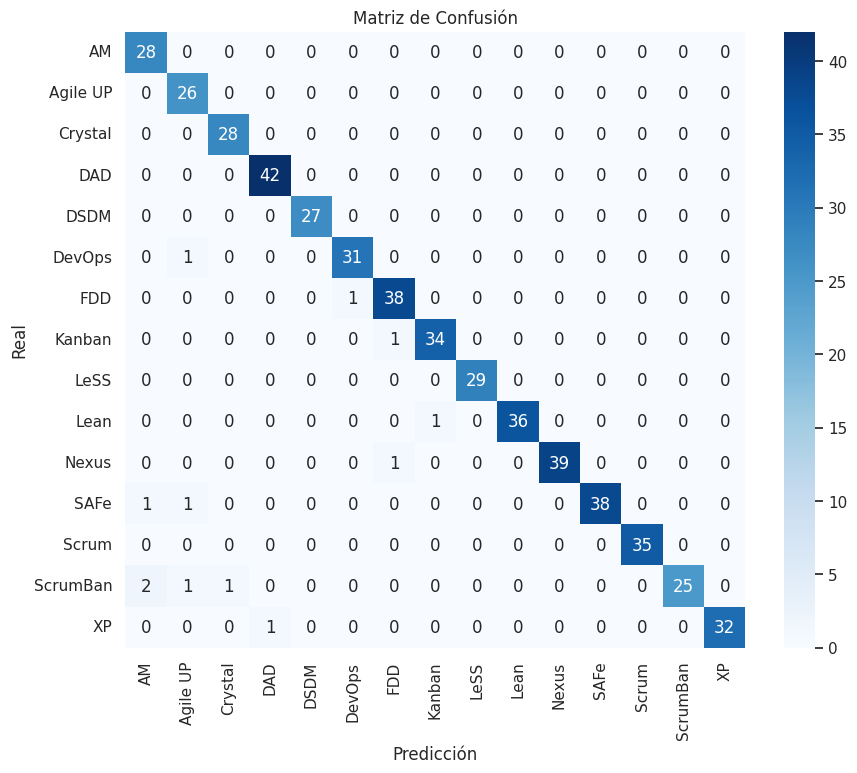

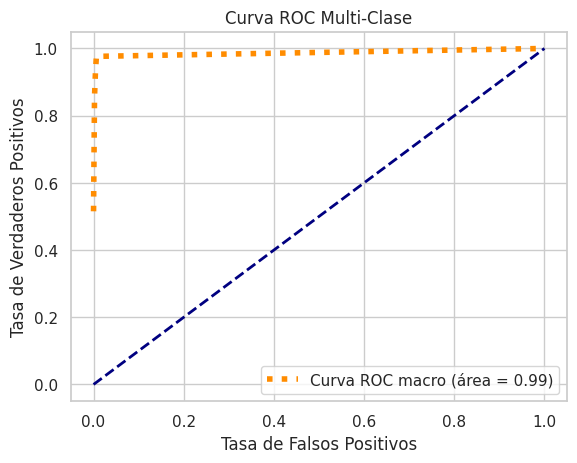

In [150]:
# Paso 12: Función para generar métricas y gráficas (Matriz de Confusión, ROC, AUC, Reporte de Clasificación)
from sklearn.metrics import classification_report

def generar_metricas():
    # Obtener las variables del modelo bayesiano
    model_vars = list(model_bayes_identificada.nodes())

    # Asegurarse de que 'Metodología Recomendada' está en las variables del modelo
    if 'Metodología Recomendada' not in model_vars:
        print("La variable 'Metodología Recomendada' no está en el modelo.")
        return

    # Separar las características y la variable objetivo
    feature_vars = [var for var in model_vars if var != 'Metodología Recomendada']

    # Filtrar el conjunto de datos para incluir solo las variables del modelo
    data_filtered = data[model_vars]

    # Separar características y etiquetas reales
    X = data_filtered[feature_vars]
    y_true = data_filtered['Metodología Recomendada']

    # Realizar predicciones
    y_pred = model_bayes_identificada.predict(X)['Metodología Recomendada']

    # Generar reporte de clasificación
    print("\nReporte de Clasificación")
    print(classification_report(y_true, y_pred, target_names=label_encoders['Metodología Recomendada'].classes_))

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Metodología Recomendada'].classes_,
                yticklabels=label_encoders['Metodología Recomendada'].classes_)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

    # Calcular ROC y AUC para problemas multiclase
    # Usaremos la estrategia One-vs-Rest
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    # Binarizar las etiquetas
    y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
    y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_true))
    n_classes = y_true_binarized.shape[1]

    # Calcular ROC y AUC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular ROC y AUC promedio (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Graficar la curva ROC macro
    plt.figure()
    plt.plot(fpr["macro"], tpr["macro"],
             label='Curva ROC macro (área = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='darkorange', linestyle=':', linewidth=4)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Curva ROC Multi-Clase')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend(loc="lower right")
    plt.show()

print("\n### Métricas y Gráficas")
generar_metricas()

#Paso 13: Función para Recomendar Metodologías y Mostrar Resultados
Esta función maneja la lógica principal de recomendación, generando las tablas de resultados, visualizando las redes bayesianas y mostrando las métricas.

In [151]:
# Paso 13: Función para recomendar metodologías y mostrar resultados
def recommend_methods(b):
    """
    Función que captura los valores actuales de los widgets, actualiza la evidencia,
    y genera la tabla de resultados junto con las redes bayesianas identificada y recomendada.
    """
    global result_table, model_bayes_identificada, current_recommended_network, inference_recomendada

    with output_box:
        clear_output()

        # Paso 13.1: Capturar los valores actuales de las variables capturadas en los widgets
        # Este bloque asegura que siempre estamos trabajando con los valores más recientes ingresados por el usuario.
        evidencia_usuario = {key: widget.value for key, widget in widgets_dict.items()}

        # Paso 13.2: Generar la tabla combinada con los resultados actualizados
        result_table = generar_tabla_resultado()  # Llama a la función que procesa los datos actuales

        # Paso 13.3: Mostrar la tabla de variables capturadas (esto se actualizará según los nuevos valores)
        print("\nVariables Capturadas")
        df_variables = mostrar_variables_capturadas()
        display(df_variables)

        # Paso 13.4: Mostrar la tabla de resultados actualizada
        print("\nTabla de Resultados")
        display(result_table)

        # Paso 13.5: Mostrar las redes bayesianas identificada y generada para los valores actuales
        print("\nRed Bayesiana Identificada")
        mostrar_red_bayesiana(model_bayes_identificada, "Red Bayesiana Identificada")

        print("\nRed Bayesiana Generada")
        mostrar_red_bayesiana(current_recommended_network, "Red Bayesiana Generada")

        # Paso 13.6: Generar métricas y gráficas adicionales (matriz de confusión, ROC, AUC, reporte de clasificación)
        # generar_metricas()  # Llama a la función para mostrar las métricas de rendimiento


#Paso 14: Función para Mostrar las Redes Bayesianas
Permite visualizar las redes bayesianas identificada y recomendada en cualquier momento.

In [152]:
# Paso 14: Función para mostrar las redes bayesianas

def show_networks(b):
    with output_box:
        clear_output()
        print("\n### Red Bayesiana Identificada")
        mostrar_red_bayesiana(model_bayes_identificada, "Red Bayesiana Identificada")

        print("\n### Red Bayesiana Generada")
        mostrar_red_bayesiana(current_recommended_network, "Red Bayesiana Generada")


#Paso 15: Función para Agregar un Nodo a la Red Recomendada
Permite agregar un nodo a la red recomendada y actualizar la inferencia en consecuencia.

In [153]:
# Paso 15: Función para agregar un nodo a la red recomendada

def agregar_nodo(b):
    global current_recommended_network, inference_recomendada, result_table, nodos_agregados

    with output_box:
        clear_output()

        # Nodos disponibles para agregar
        available_nodes = [node for node in model_bayes_identificada.nodes() if node not in current_recommended_network.nodes()]

        if not available_nodes:
            print("No hay más nodos para agregar.")
            return

        nodo_a_agregar = available_nodes[0]
        nodos_agregados.append(nodo_a_agregar)
        print(f"Agregando nodo: {nodo_a_agregar}")

        # Agregar el nodo y sus aristas desde el modelo identificado
        current_recommended_network.add_node(nodo_a_agregar)
        edges_to_add = [(u, v) for u, v in model_bayes_identificada.edges() if (u == nodo_a_agregar or v == nodo_a_agregar)]
        current_recommended_network.add_edges_from(edges_to_add)

        # Asegurarse de que 'Fase' sigue en la red después de agregar el nodo
        if 'Fase' not in current_recommended_network.nodes():
            current_recommended_network.add_node('Fase')
            # Agregar cualquier conexión relevante que 'Fase' tenga
            if ('Fase', 'Metodología Recomendada') in model_bayes_identificada.edges():
                current_recommended_network.add_edge('Fase', 'Metodología Recomendada')

        # Re-entrenar la red bayesiana recomendada
        try:
            current_recommended_network.fit(data, estimator=MaximumLikelihoodEstimator)
            inference_recomendada = VariableElimination(current_recommended_network)
            print(f"Nodo '{nodo_a_agregar}' agregado exitosamente.")
        except Exception as e:
            print(f"Error al agregar el nodo '{nodo_a_agregar}': {e}")
            # Si ocurre un error, revertir los cambios
            current_recommended_network.remove_node(nodo_a_agregar)
            nodos_agregados.remove(nodo_a_agregar)
            return

        # Generar la tabla de resultados
        result_table = generar_tabla_resultado()

        # Mostrar la red recomendada y la tabla
        print("\nRed Bayesiana Generada Actualizada")
        mostrar_red_bayesiana(current_recommended_network, "Red Bayesiana Generada Actualizada")

        # Mostrar los nodos agregados
        if nodos_agregados:
            print("\nNodos Agregados:")
            display(pd.DataFrame(nodos_agregados, columns=['Nodo']))

        print("\n### Tabla de Resultados Actualizada")
        display(result_table)



#Paso 16: Función para Quitar un Nodo de la Red Recomendada
Permite quitar un nodo de la red recomendada y actualizar la inferencia en consecuencia.

In [154]:
# Paso 16: Función para quitar un nodo de la red recomendada

def quitar_nodo(b):
    global current_recommended_network, inference_recomendada, result_table, nodos_quitados

    with output_box:
        clear_output()

        # Nodos que se pueden quitar (excepto 'Metodología Recomendada' y 'Fase')
        removable_nodes = [node for node in current_recommended_network.nodes() if node not in ['Metodología Recomendada', 'Fase']]

        if not removable_nodes:
            print("No hay nodos removibles disponibles.")
            return

        nodo_a_quitar = removable_nodes[0]
        nodos_quitados.append(nodo_a_quitar)
        print(f"Quitando nodo: {nodo_a_quitar}")

        # Quitar el nodo y sus aristas
        current_recommended_network.remove_node(nodo_a_quitar)

        # Asegurarse de que 'Fase' sigue en la red después de quitar el nodo
        if 'Fase' not in current_recommended_network.nodes():
            current_recommended_network.add_node('Fase')
            # Aquí debes volver a agregar cualquier conexión relevante que 'Fase' tenga en el modelo original
            # Por ejemplo:
            if ('Fase', 'Metodología Recomendada') in model_bayes_identificada.edges():
                current_recommended_network.add_edge('Fase', 'Metodología Recomendada')

        # Re-entrenar la red bayesiana recomendada
        try:
            current_recommended_network.fit(data, estimator=MaximumLikelihoodEstimator)
            inference_recomendada = VariableElimination(current_recommended_network)
            print(f"Nodo '{nodo_a_quitar}' quitado exitosamente.")
        except Exception as e:
            print(f"Error al quitar el nodo '{nodo_a_quitar}': {e}")
            # Revertir cambios si hay un error
            current_recommended_network.add_node(nodo_a_quitar)
            edges_to_readd = [(u, v) for u, v in model_bayes_identificada.edges() if (u == nodo_a_quitar or v == nodo_a_quitar)]
            current_recommended_network.add_edges_from(edges_to_readd)
            nodos_quitados.remove(nodo_a_quitar)
            return

        # Generar la tabla de resultados
        result_table = generar_tabla_resultado()

        # Mostrar la red recomendada y la tabla
        print("\nRed Bayesiana Generada Actualizada")
        mostrar_red_bayesiana(current_recommended_network, "Red Bayesiana Generada Actualizada")

        # Mostrar los nodos quitados
        if nodos_quitados:
            print("\nNodos Quitados:")
            display(pd.DataFrame(nodos_quitados, columns=['Nodo']))

        print("\n### Tabla de Resultados Actualizada")
        display(result_table)



#Paso 17: Función para Mostrar la Tabla Recomendada
Esta función muestra una segunda tabla que contiene las mejores recomendaciones por fase, basándose en la mejor ponderación de éxito y reducción de riesgo.

In [155]:
# Paso 17: Función para mostrar la tabla recomendada

def mostrar_tabla(b):
    with output_box:
        clear_output()
        if result_table.empty:
            print("No hay resultados para mostrar. Presiona 'Recomendar' para generar la tabla.")
        else:
            print("\n### Tabla de Resultados")
            display(result_table)

            # Generar la tabla recomendada con las mejores opciones
            print("\n### Tabla Recomendada")
            tabla_recomendada = result_table.copy()

            # Seleccionar la mejor metodología entre identificada y generada para cada fase
            tabla_recomendada['Mejor Metodología'] = tabla_recomendada.apply(
                lambda row: row['Metodología Generada'] if row['Tasa de Éxito Esperado (%)'] > row['Tasa de Éxito (%)']
                else row['Metodología Identificada'], axis=1)
            tabla_recomendada['Mejor Tasa de Éxito (%)'] = tabla_recomendada[['Tasa de Éxito (%)', 'Tasa de Éxito Esperado (%)']].max(axis=1)
            tabla_recomendada['Mejor Nivel de Riesgo (%)'] = tabla_recomendada[['Nivel de Riesgo Identificado (%)', 'Nivel de Riesgo Esperado (%)']].min(axis=1)

            # Crear la tabla final con las columnas solicitadas
            tabla_final = tabla_recomendada[[
                'Fase',
                'Mejor Metodología',
                'Tipo Identificado',
                'Mejor Nivel de Riesgo (%)',
                'Mejor Tasa de Éxito (%)'
            ]]

            display(tabla_final)


#Paso 18: Función para Generar la Interfaz de Widgets con Estilo
Esta función crea los widgets interactivos que permiten al usuario ingresar las características del proyecto.

In [156]:
# Paso 18: Función para generar la interfaz de widgets con estilo

def generar_interfaz_widgets():
    global widgets_dict

    # Definir estilo y layout para los widgets
    style = {'description_width': '250px'}
    layout = widgets.Layout(width='500px')

    # Crear widgets individuales con estilo y layout actualizado
    widgets_dict = {
        'Tipo de Proyecto': widgets.Dropdown(
            options=['Inteligencia Artificial', 'Sistemas de Información', 'Investigación Multidisciplinaria'],
            description='Tipo de Proyecto:', style=style, layout=layout
        ),
        'Complejidad Técnica': widgets.Dropdown(
            options=['Baja', 'Media', 'Alta'],
            description='Complejidad Técnica:', style=style, layout=layout
        ),
        'Madurez Organizacional': widgets.Dropdown(
            options=['Baja', 'Media', 'Alta'],
            description='Madurez Organizacional:', style=style, layout=layout
        ),
        'Disponibilidad de Recursos': widgets.Dropdown(
            options=['Escasa', 'Adecuada', 'Abundante'],
            description='Disponibilidad de Recursos:', style=style, layout=layout
        ),
        'Frecuencia de Cambios en Requisitos': widgets.Dropdown(
            options=['Baja', 'Media', 'Alta'],
            description='Frecuencia de Cambios en Requisitos:', style=style, layout=layout
        ),
        'Estabilidad del Entorno del Proyecto': widgets.Dropdown(
            options=['Estable', 'Moderado', 'Inestable'],
            description='Estabilidad del Entorno:', style=style, layout=layout
        ),
        'Adaptabilidad Requerida': widgets.Dropdown(
            options=['Bajo', 'Medio', 'Alto'],
            description='Adaptabilidad Requerida:', style=style, layout=layout
        ),
        'Visibilidad Requerida': widgets.Dropdown(
            options=['Bajo', 'Medio', 'Alto'],
            description='Visibilidad Requerida:', style=style, layout=layout
        ),
        'Mitigación Requerida': widgets.Dropdown(
            options=['Bajo', 'Medio', 'Alto'],
            description='Mitigación Requerida:', style=style, layout=layout
        ),
        'Complejidad': widgets.Dropdown(
            options=['Baja', 'Media', 'Alta'],
            description='Complejidad:', style=style, layout=layout
        ),
        'Nivel de Riesgo': widgets.Dropdown(
            options=['Bajo', 'Medio', 'Alto'],
            description='Nivel de Riesgo:', style=style, layout=layout
        ),
        'Tamaño del Equipo': widgets.Dropdown(
            options=['Muy pequeño', 'Pequeño', 'Mediano', 'Grande', 'Muy grande'],
            description='Tamaño del Equipo:', style=style, layout=layout
        ),
        'Duración del Proyecto': widgets.Dropdown(
            options=['Muy corta', 'Corta', 'Moderada', 'Larga', 'Muy larga'],
            description='Duración del Proyecto:', style=style, layout=layout
        ),
        'Restricción de Tiempo': widgets.Dropdown(
            options=['Flexibles', 'Moderadas', 'Estrictas'],
            description='Restricción de Tiempo:', style=style, layout=layout
        ),
        'Restricción de Costo': widgets.Dropdown(
            options=['Bajo', 'Medio', 'Alto'],
            description='Restricción de Costo:', style=style, layout=layout
        ),
    }

    # Organizar widgets en grupos para pestañas
    tab_contents = [
        widgets.VBox([widgets_dict['Tipo de Proyecto'], widgets_dict['Complejidad'], widgets_dict['Nivel de Riesgo'],
                      widgets_dict['Complejidad Técnica'], widgets_dict['Madurez Organizacional'],
                      widgets_dict['Disponibilidad de Recursos'], widgets_dict['Frecuencia de Cambios en Requisitos'],
                      widgets_dict['Estabilidad del Entorno del Proyecto']]),
        widgets.VBox([widgets_dict['Adaptabilidad Requerida'], widgets_dict['Visibilidad Requerida'],
                      widgets_dict['Mitigación Requerida'], widgets_dict['Tamaño del Equipo'],
                      widgets_dict['Duración del Proyecto'], widgets_dict['Restricción de Tiempo'],
                      widgets_dict['Restricción de Costo']])
    ]

    # Crear contenedor de Tabs
    tab = widgets.Tab(children=tab_contents)
    tab_titles = ['Características del Proyecto', 'Requerimientos y Recursos']

    for i, title in enumerate(tab_titles):
        tab.set_title(i, title)

    # Mostrar el widget de Tabs
    display(tab)


#Paso 19: Definir los Botones y su Estilo
Definimos los botones interactivos que permitirán al usuario realizar acciones como recomendar metodologías, mostrar redes, agregar o quitar nodos y mostrar tablas.

In [157]:
# Paso 19: Definir los botones y su estilo

# Definir el área de salida para mostrar resultados
output_box = widgets.Output(layout=widgets.Layout(width='1000px', padding='10px'))

# Definir los botones con estilo personalizado
btn_recomendar = widgets.Button(
    description="Recomendar",
    button_style='success',
    layout=widgets.Layout(width='150px', height='40px'),
    style={'button_color': '#5cb85c', 'font_color': 'white'}
)

btn_mostrar_redes = widgets.Button(
    description="Mostrar Redes",
    button_style='primary',
    layout=widgets.Layout(width='150px', height='40px'),
    style={'button_color': '#337ab7', 'font_color': 'white'}
)

btn_agregar_nodo = widgets.Button(
    description="Agregar Nodo",
    button_style='info',
    layout=widgets.Layout(width='150px', height='40px'),
    style={'button_color': '#0275d8', 'font_color': 'white'}
)

btn_quitar_nodo = widgets.Button(
    description="Quitar Nodo",
    button_style='warning',
    layout=widgets.Layout(width='150px', height='40px'),
    style={'button_color': '#f0ad4e', 'font_color': 'white'}
)

btn_mostrar_tabla = widgets.Button(
    description="Mostrar Tabla",
    button_style='primary',
    layout=widgets.Layout(width='150px', height='40px'),
    style={'button_color': '#5bc0de', 'font_color': 'white'}
)

# Asignar las funciones a los botones
btn_recomendar.on_click(recommend_methods)
btn_mostrar_redes.on_click(show_networks)
btn_agregar_nodo.on_click(agregar_nodo)
btn_quitar_nodo.on_click(quitar_nodo)
btn_mostrar_tabla.on_click(mostrar_tabla)

# Crear una caja horizontal para los botones
botones_box = widgets.HBox([btn_recomendar, btn_mostrar_redes, btn_agregar_nodo, btn_quitar_nodo, btn_mostrar_tabla])


#Paso 20: Función para Crear y Mostrar la Interfaz Completa
Esta función combina los widgets y los botones para crear la interfaz interactiva completa.

In [158]:
# Paso 20: Función para crear y mostrar la interfaz completa

def crear_interfaz_completa():
    # Generar las preguntas/widgets
    generar_interfaz_widgets()

    # Mostrar los botones y el área de output
    display(widgets.VBox([botones_box, output_box]))


#Paso 21: Ejecutar la Interfaz Completa
Finalmente, ejecutamos la función para crear y mostrar la interfaz completa en el Notebook.

In [159]:
# Paso 21: Ejecutar la interfaz completa

crear_interfaz_completa()
